**In this Project you have to build a thyroid detection binary classifier with following conditions**

1. It should be three layer deep model including visible layer

2. activation function for hidden layers should be tanh 

3. take the optimizer as adam

The thyroid data is available at Kaggle

In [1]:
# Import necessary libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Import scikit-learn metrics module for model evaluation
from sklearn import metrics

# Import TensorFlow and Keras for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Set display options for pandas and suppress warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset from a CSV file into a Pandas DataFrame
data = pd.read_csv('hypothyroid.csv')

In [3]:
# Create a copy of the original DataFrame for further processing
df = data.copy()

In [4]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P


In [6]:
# Display the value counts for each column in the DataFrame
for col in df.columns:
    count = data[col].value_counts()
    print(count)
    print('-----------------------------')

age
59     95
60     91
70     90
73     81
55     81
       ..
4       1
5       1
455     1
6       1
?       1
Name: count, Length: 94, dtype: int64
-----------------------------
sex
F    2480
M    1142
?     150
Name: count, dtype: int64
-----------------------------
on thyroxine
f    3308
t     464
Name: count, dtype: int64
-----------------------------
query on thyroxine
f    3722
t      50
Name: count, dtype: int64
-----------------------------
on antithyroid medication
f    3729
t      43
Name: count, dtype: int64
-----------------------------
sick
f    3625
t     147
Name: count, dtype: int64
-----------------------------
pregnant
f    3719
t      53
Name: count, dtype: int64
-----------------------------
thyroid surgery
f    3719
t      53
Name: count, dtype: int64
-----------------------------
I131 treatment
f    3713
t      59
Name: count, dtype: int64
-----------------------------
query hypothyroid
f    3538
t     234
Name: count, dtype: int64
-----------------------------

In [7]:
# Replace '?' with pandas.NA (null) in the DataFrame

df.replace('?', pd.NA, inplace=True)

In [8]:
# Drop irrelevant columns from the DataFrame

df.drop(columns={'T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'}, inplace=True)

In [9]:
df['age'] = df['age'].replace('455', '45')

In [10]:
# Convert selected columns to numeric data type
cols = ['age','FTI','TSH','T3','TT4','T4U']

for col in cols:
    df[col] = pd.to_numeric(df[col])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  binaryClass      3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


In [12]:
# Rename the 'binaryClass' column to 'Target'

df.rename(columns={'binaryClass' : 'Target'}, inplace=True)

In [13]:
for col in df.columns:
    counts = df[col].value_counts()
    print(counts)
    print('-----------------------------')

age
59.0    95
60.0    91
70.0    90
73.0    81
55.0    81
        ..
92.0     2
10.0     1
4.0      1
5.0      1
6.0      1
Name: count, Length: 92, dtype: int64
-----------------------------
sex
F    2480
M    1142
Name: count, dtype: int64
-----------------------------
sick
f    3625
t     147
Name: count, dtype: int64
-----------------------------
pregnant
f    3719
t      53
Name: count, dtype: int64
-----------------------------
thyroid surgery
f    3719
t      53
Name: count, dtype: int64
-----------------------------
I131 treatment
f    3713
t      59
Name: count, dtype: int64
-----------------------------
lithium
f    3754
t      18
Name: count, dtype: int64
-----------------------------
goitre
f    3738
t      34
Name: count, dtype: int64
-----------------------------
tumor
f    3676
t      96
Name: count, dtype: int64
-----------------------------
TSH
0.2     116
1.3     105
1.1      97
1.4      91
1.5      80
       ... 
86.0      1
18.4      1
89.0      1
29.0      1
40.0 

In [14]:
# Check and display the sum of null values in each column of the DataFrame

df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Target               0
dtype: int64

In [15]:
# Fill missing values in specified columns with the mean value
fl_cols = ['FTI', 'TSH', 'T3', 'TT4', 'T4U']

for col in fl_cols:
    df[col] = df[col].fillna(df[col].mean())

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Target             0
dtype: int64

# **EDA**

In [18]:
df['Target'].value_counts()

Target
P    3341
N     280
Name: count, dtype: int64

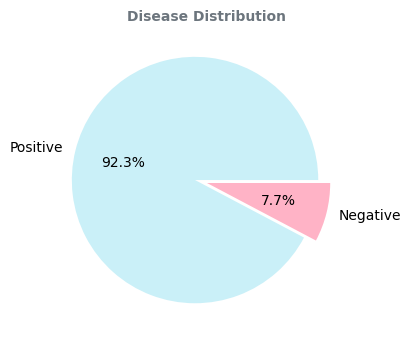

In [20]:
# Visualize disease distribution using a pie chart
plt.figure(figsize=(4,4))

plt.pie(df['Target'].value_counts(), colors=['#caf0f8', '#ffb3c6'], labels=['Positive', 'Negative'], autopct='%1.1f%%', explode=(0.1, 0))
plt.title('Disease Distribution', fontdict={'fontsize' : 10, 'weight' : 'bold', 'color' : '#6c757d'})

plt.show()

In [21]:
# Creating a DataFrame 'pstv_df' containing positive cases and sorted by age
pstv_df = df[df['Target']=='P']
pstv_df.sort_values(by='age', ascending=True, inplace=True)

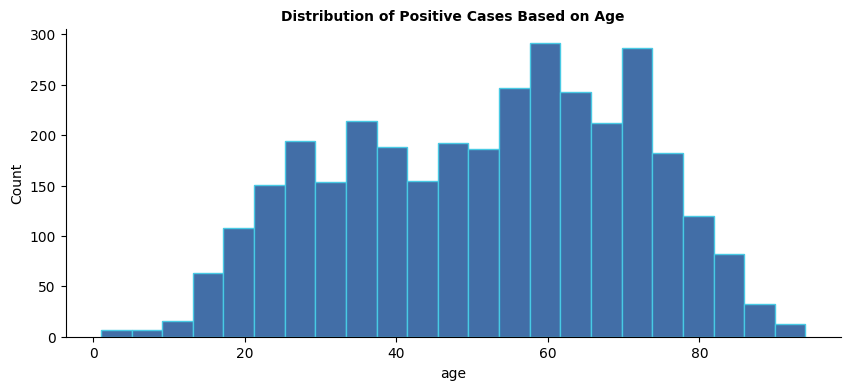

In [22]:
# Visualize the distribution of positive cases based on age using a histogram
plt.figure(figsize=(10, 4))

sns.histplot(x='age', data=pstv_df, color='#023e8a', edgecolor='#48cae4')
plt.xticks(range(0, int(max(pstv_df['age'])) + 1, 20))
plt.title('Distribution of Positive Cases Based on Age', fontdict={'fontsize' : 10, 'fontweight' : 'bold'})

sns.despine()
plt.show()

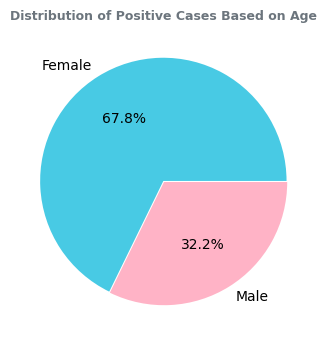

In [23]:
# Visualize the distribution of positive cases based on gender using a pie chart
plt.figure(figsize=(4, 4))

plt.pie(pstv_df['sex'].value_counts(), autopct='%1.1f%%', explode=(0.01, 0), colors=['#48cae4', '#ffb3c6'], labels=['Female', 'Male'])
plt.title('Distribution of Positive Cases Based on Age', fontdict={'fontsize' : 9, 'fontweight' : 'bold', 'color' : '#6c757d'})

plt.show()

In [24]:
pstv_df['pregnant'].value_counts()

pregnant
f    3290
t      51
Name: count, dtype: int64

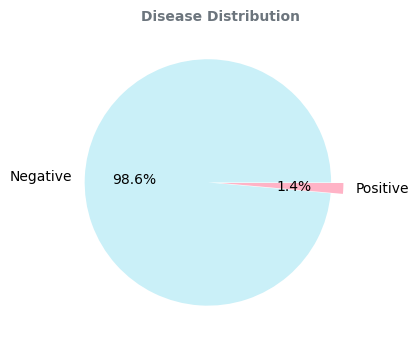

In [25]:
# Visualize disease distribution based on the 'pregnant' attribute using a pie chart
plt.figure(figsize=(4,4))

plt.pie(df['pregnant'].value_counts(), colors=['#caf0f8', '#ffb3c6'], labels=['Negative', 'Positive'], autopct='%1.1f%%', explode=(0.1, 0))
plt.title('Disease Distribution', fontdict={'fontsize' : 10, 'weight' : 'bold', 'color' : '#6c757d'})

plt.show()

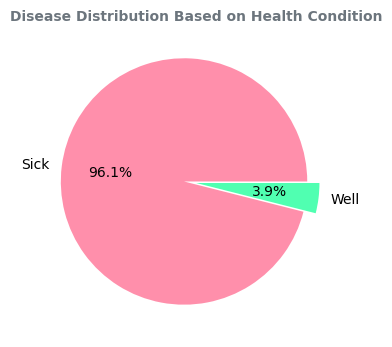

In [26]:
# Visualize disease distribution based on the Health Condition using a pie chart
plt.figure(figsize=(4,4))

plt.pie(df['sick'].value_counts(), colors=['#ff8fab', '#50ffb1'], labels=['Sick', 'Well'], autopct='%1.1f%%', explode=(0.1, 0))
plt.title('Disease Distribution Based on Health Condition', fontdict={'fontsize' : 10, 'weight' : 'bold', 'color' : '#6c757d'})

plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3621 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3621 non-null   float64
 1   sex              3621 non-null   object 
 2   sick             3621 non-null   object 
 3   pregnant         3621 non-null   object 
 4   thyroid surgery  3621 non-null   object 
 5   I131 treatment   3621 non-null   object 
 6   lithium          3621 non-null   object 
 7   goitre           3621 non-null   object 
 8   tumor            3621 non-null   object 
 9   TSH              3621 non-null   float64
 10  T3               3621 non-null   float64
 11  TT4              3621 non-null   float64
 12  T4U              3621 non-null   float64
 13  FTI              3621 non-null   float64
 14  Target           3621 non-null   object 
dtypes: float64(6), object(9)
memory usage: 452.6+ KB


In [28]:
obj_columns = df.select_dtypes(include='object').columns
obj_columns

Index(['sex', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
       'lithium', 'goitre', 'tumor', 'Target'],
      dtype='object')

In [29]:
# Using LabelEncoder to encode categorical variables in the DataFrame
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in obj_columns:
    df[col] = encoder.fit_transform(df[col])


In [293]:
df

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Target
0,41.0,0,0,0,0,0,0,0,0,1.300000,2.5000,125.000000,1.140,109.000000,1
1,23.0,0,0,0,0,0,0,0,0,4.100000,2.0000,102.000000,0.995,110.469649,1
2,46.0,1,0,0,0,0,0,0,0,0.980000,2.0135,109.000000,0.910,120.000000,1
3,70.0,0,0,0,0,0,0,0,0,0.160000,1.9000,175.000000,0.995,110.469649,1
4,70.0,0,0,0,0,0,0,0,0,0.720000,1.2000,61.000000,0.870,70.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0,0,0,0,0,0,0,1,5.086766,2.0135,108.319345,0.995,110.469649,1
3768,68.0,0,0,0,0,0,0,0,0,1.000000,2.1000,124.000000,1.080,114.000000,1
3769,74.0,0,0,0,0,0,0,0,0,5.100000,1.8000,112.000000,1.070,105.000000,1
3770,72.0,1,0,0,0,0,0,0,0,0.700000,2.0000,82.000000,0.940,87.000000,1


In [30]:
# Compute and display the correlation matrix for the DataFrame
df.corr()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Target
age,1.000000,0.000154,0.087142,-0.123983,-0.028897,0.052297,-0.032565,-0.056043,-0.022860,-0.046806,-0.233928,-0.041590,-0.171505,0.054532,-0.002264
sex,0.000154,1.000000,0.005799,-0.081123,-0.036966,-0.019764,-0.014171,0.007869,-0.077166,-0.033750,-0.064136,-0.170240,-0.230353,-0.039357,0.051859
sick,0.087142,0.005799,1.000000,-0.024236,-0.000639,-0.024949,-0.014332,-0.019741,0.011483,-0.022403,-0.075935,-0.034622,-0.037353,-0.019333,0.000306
pregnant,-0.123983,-0.081123,-0.024236,1.000000,-0.014427,-0.014706,-0.008448,0.012663,0.113131,-0.020307,0.182410,0.175339,0.337947,-0.015191,0.034601
thyroid surgery,-0.028897,-0.036966,-0.000639,-0.014427,1.000000,0.004300,-0.008532,-0.011752,-0.005108,0.028875,-0.026359,-0.029037,0.018970,-0.033065,0.017563
I131 treatment,0.052297,-0.019764,-0.024949,-0.014706,0.004300,1.000000,-0.008697,-0.011979,-0.020087,-0.001959,0.010633,-0.011236,0.011595,-0.021451,-0.007032
lithium,-0.032565,-0.014171,-0.014332,-0.008448,-0.008532,-0.008697,1.000000,-0.006881,-0.011539,-0.006929,0.008234,-0.013962,0.015284,-0.026225,0.005761
goitre,-0.056043,0.007869,-0.019741,0.012663,-0.011752,-0.011979,-0.006881,1.000000,0.002114,-0.011731,0.012307,-0.019005,0.035527,-0.040364,0.028185
tumor,-0.022860,-0.077166,0.011483,0.113131,-0.005108,-0.020087,-0.011539,0.002114,1.000000,-0.014108,0.097454,0.058491,0.087986,0.014101,0.001747
TSH,-0.046806,-0.033750,-0.022403,-0.020307,0.028875,-0.001959,-0.006929,-0.011731,-0.014108,1.000000,-0.156667,-0.268786,0.070838,-0.301764,-0.430355


In [31]:
# Separating the features (X) and target variable (y) from the DataFrame
x = df.drop(columns=['Target'])
y = df['Target']

In [32]:
# Split the data into training and testing sets using train_test_split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)

In [33]:
# Display the shapes of the training and testing sets
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2896, 14)
(725, 14)
(2896,)
(725,)


In [34]:
# Performing SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance
from imblearn.over_sampling import SMOTE
SMT = SMOTE()

xtrain_smt, ytrain_smt = SMT.fit_resample(xtrain, ytrain)
print(f'The shape of resampled xtrain : {xtrain_smt.shape}')
print(f'The shape of resampled ytrain : {xtrain_smt.shape}\n')
print(ytrain_smt.value_counts())

The shape of resampled xtrain : (5354, 14)
The shape of resampled ytrain : (5354, 14)

Target
0    2677
1    2677
Name: count, dtype: int64


In [50]:
# Initializing the Model
Model = Sequential()

# Adding the input Layer
Model.add(Dense(units=20, activation='tanh', input_dim=xtrain_smt.shape[1]))

# Adding Hidden Layers
Model.add(Dense(units=10, activation='tanh'))
Model.add(Dropout(0.2))

Model.add(Dense(units=58, activation='tanh'))
Model.add(Dropout(0.2))

# Output layer with binary classification (sigmoid activation for binary classification)
Model.add(Dense(units=1, activation='sigmoid'))

# Complie the Model
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [51]:
# defining early stopping criteria for the model
early_stop = EarlyStopping(monitor='accuracy', patience=10, min_delta=0, mode='auto', verbose=0, restore_best_weights=True)

In [52]:
# Train the Model
history = Model.fit(xtrain_smt, ytrain_smt, epochs=500, batch_size=32, callbacks=[early_stop])

Epoch 1/500
168/168 [==============================] - 2s 2ms/step - loss: 0.3764 - accuracy: 0.8338
Epoch 2/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9567
Epoch 3/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9668
Epoch 4/500
168/168 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.9733
Epoch 5/500
168/168 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9701
Epoch 6/500
168/168 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9722
Epoch 7/500
168/168 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9707
Epoch 8/500
168/168 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9742
Epoch 9/500
168/168 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9725
Epoch 10/500
168/168 [==============================] - 0s 2ms/step - loss: 0.0836 - accura

In [55]:
# Make prediction on the Training set
train_pred_prob = Model.predict(xtrain_smt)

# Convert the predictions to binary predictions (0 or 1) using a threshold
threshold = 0.5
train_ped_binary = (train_pred_prob > threshold).astype('int')

'''(train_pred_prob > threshold): This creates a binary mask by comparing each predicted probability with the threshold. If the predicted probability is greater than the threshold, the corresponding element in the mask is True; otherwise, it's False.'''

# Create classification report for the training set
print(metrics.classification_report(ytrain_smt, train_ped_binary))

168/168 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2677
           1       0.98      0.98      0.98      2677

    accuracy                           0.98      5354
   macro avg       0.98      0.98      0.98      5354
weighted avg       0.98      0.98      0.98      5354



In [56]:
# Make prediction on the testing set
test_pred_prob = Model.predict(xtest)

# Convert the predictions to binary predictions (0 or 1) using a threshold
threshold = 0.5
test_pred_prob = (test_pred_prob > threshold).astype('int')

'''(train_pred_prob > threshold): This creates a binary mask by comparing each predicted probability with the threshold. If the predicted probability is greater than the threshold, the corresponding element in the mask is True; otherwise, it's False.'''

# Create classification report for the testing set
print(metrics.classification_report(ytest, test_pred_prob))

23/23 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        61
           1       0.99      0.98      0.99       664

    accuracy                           0.98       725
   macro avg       0.90      0.96      0.93       725
weighted avg       0.98      0.98      0.98       725



## *Testing*

In [57]:
class_labels = ['Positive', 'Negative']

encoder = LabelEncoder()
encoder.fit(class_labels)

LabelEncoder()

In [103]:
test_df = pd.concat([xtest, ytest], axis=1)

In [132]:
sample_record = test_df.sample(1)
sample_record

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Target
2416,33.0,0,0,0,0,0,0,0,0,10.3,2.0,68.0,1.15,59.0,0


In [133]:
sample_test = sample_record.drop(columns=['Target'])

In [134]:
def Predict(features):
    pred_prob = Model.predict(features)

    # Convert the predictions to binary predictions (0 or 1) using a threshold
    threshold = 0.5
    train_pred_binary = (pred_prob > threshold).astype('int')
    pred_class = encoder.inverse_transform(train_pred_binary)

    return pred_class

Predict(sample_test)

1/1 [==============================] - 0s 39ms/step


array(['Negative'], dtype='<U8')